# Loading the Iris Data with Scikit-learn
Create a separate data set in CSV file per each class and named it based on its Target classes.

## Features in the Iris dataset:
* Sepal length in cm
* Sepal width in cm
* Petal length in cm
* Petal width in cm

## Target classes to predict:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

![IrisFeatures](https://www.python-course.eu/images/sepals_and_petals.webp)

# Create a Function to Handle the Dataset

In [ ]:
# Include the required libraries
import numpy as np
from glob import glob
from os.path import basename

# Define a function that handle data set files in CSV format
def load_features(folder):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.loadtxt(filename, dtype=float, delimiter=',')
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))
    return dataset, classmap

#Upload Data
* Open the panel on the left side of Colab by clicking on the folder icon.
* Create a folder and name it "dataset".
* Drag csv files from your computer to the tab to upload them into colab.

In [ ]:
# Load the Iris data set as features and classes
features, classmap = load_features('/content/dataset')

# Print data set details
print("Classes:", classmap)
print("Features:", features)

Classes: {0: 'Virginica', 1: 'Setosa', 2: 'Versicolor'}
Features: [[6.3 3.3 6.  2.5 0. ]
 [5.8 2.7 5.1 1.9 0. ]
 [7.1 3.  5.9 2.1 0. ]
 [6.3 2.9 5.6 1.8 0. ]
 [6.5 3.  5.8 2.2 0. ]
 [7.6 3.  6.6 2.1 0. ]
 [4.9 2.5 4.5 1.7 0. ]
 [7.3 2.9 6.3 1.8 0. ]
 [6.7 2.5 5.8 1.8 0. ]
 [7.2 3.6 6.1 2.5 0. ]
 [6.5 3.2 5.1 2.  0. ]
 [6.4 2.7 5.3 1.9 0. ]
 [6.8 3.  5.5 2.1 0. ]
 [5.7 2.5 5.  2.  0. ]
 [5.8 2.8 5.1 2.4 0. ]
 [6.4 3.2 5.3 2.3 0. ]
 [6.5 3.  5.5 1.8 0. ]
 [7.7 3.8 6.7 2.2 0. ]
 [7.7 2.6 6.9 2.3 0. ]
 [6.  2.2 5.  1.5 0. ]
 [6.9 3.2 5.7 2.3 0. ]
 [5.6 2.8 4.9 2.  0. ]
 [7.7 2.8 6.7 2.  0. ]
 [6.3 2.7 4.9 1.8 0. ]
 [6.7 3.3 5.7 2.1 0. ]
 [7.2 3.2 6.  1.8 0. ]
 [6.2 2.8 4.8 1.8 0. ]
 [6.1 3.  4.9 1.8 0. ]
 [6.4 2.8 5.6 2.1 0. ]
 [7.2 3.  5.8 1.6 0. ]
 [7.4 2.8 6.1 1.9 0. ]
 [7.9 3.8 6.4 2.  0. ]
 [6.4 2.8 5.6 2.2 0. ]
 [6.3 2.8 5.1 1.5 0. ]
 [6.1 2.6 5.6 1.4 0. ]
 [7.7 3.  6.1 2.3 0. ]
 [6.3 3.4 5.6 2.4 0. ]
 [6.4 3.1 5.5 1.8 0. ]
 [6.  3.  4.8 1.8 0. ]
 [6.9 3.1 5.4 2.1 0. ]
 [6.7 3.1 5.6 

## Split the Iris data set in to training set and test set

In [ ]:
# Return to X as predictor, and y as target variables
X, y = features[:, :-1], features[:, -1]

# Include Train test set split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split data set to training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print data set partition
print("Training set:", len(X_train))
print("Test set:", len(X_test))

Training set: 120
Test set: 30


## Train the Random Forest Classifier

In [ ]:
# Include Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Choose a Random Forest Classifier and its hyperparameters
classifier = RandomForestClassifier(n_estimators=30, max_depth=10)

# Train the classifier model using training set
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Classifier prediction using train set and test set

In [ ]:
# Predict with Random Forest Classifier with training set
y_train_pred = classifier.predict(X_train)

# Predict with Random Forest Classifier with test set
y_test_pred = classifier.predict(X_test)

## Measure the model Accuracy score

In [ ]:
# Include accuracy score function from scikit-learn
from sklearn.metrics import accuracy_score

# Examine the model accuracy of training set
model_train_accuracy = accuracy_score(y_train, y_train_pred)

# Examine the model accuracy of test set
model_test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the model accuracy
print("Training set accuracy:", model_train_accuracy)
print("Test set accuracy:", model_test_accuracy)

Training set accuracy: 1.0
Test set accuracy: 0.9333333333333333


## Measures the Precision Score

In [ ]:
# Include precision score function from scikit-learn
from sklearn.metrics import precision_score

# Examine the model precision score of training set
model_train_precisionScore = precision_score(y_train, y_train_pred, average='weighted')

# Examine the model precision score of test set
model_test_precisionScore = precision_score(y_test, y_test_pred, average='weighted')

# Print the model precision score
print("Training set precision score:", model_train_precisionScore)
print("Test set precision score:", model_test_precisionScore)

Training set precision score: 1.0
Test set precision score: 0.9333333333333333


## Measures the Recall Score

In [ ]:
# Include recall score function from scikit-learn
from sklearn.metrics import recall_score

# Examine the model recall score of training set
model_train_recallScore = recall_score(y_train, y_train_pred, average='weighted')

# Examine the model recall score of training set
model_test_recallScore = recall_score(y_test, y_test_pred, average='weighted')

# Print the model precision score
print("Training set recall score:", model_train_recallScore)
print("Test set recall score:", model_test_recallScore)

Training set recall score: 1.0
Test set recall score: 0.9333333333333333


## Measures the F1 Score

In [ ]:
# Include F1 score function from scikit-learn
from sklearn.metrics import f1_score

# Examine the model F1 score of training set
model_train_F1Score = f1_score(y_train, y_train_pred, average='weighted')

# Examine the model F1 score of training set
model_test_F1Score = f1_score(y_test, y_test_pred, average='weighted')

# Print the model F1 score
print("Training set F1 score:", model_train_F1Score)
print("Test set F1 score:", model_test_F1Score)

Training set F1 score: 1.0
Test set F1 score: 0.9333333333333333


## Perform a classification report

In [ ]:
# Include classification report function from scikit-learn
from sklearn.metrics import classification_report

# Create a target names according to it's classes
target_names = ['Virginica', 'Setosa', 'Versicolor']

# Print classification report for training set
print("--------Classification report for training set--------")
print(classification_report(y_train, y_train_pred, target_names=target_names))
# Print classification report for test set
print("--------Classification report for test set------------")
print(classification_report(y_test, y_test_pred, target_names=target_names))

--------Classification report for training set--------
              precision    recall  f1-score   support

   Virginica       1.00      1.00      1.00        40
      Setosa       1.00      1.00      1.00        41
  Versicolor       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

--------Classification report for test set------------
              precision    recall  f1-score   support

   Virginica       0.90      0.90      0.90        10
      Setosa       1.00      1.00      1.00         9
  Versicolor       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



##Create a Confusion Matrix

In [ ]:
# Include confusion matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

# Examine the confusion matrix for training set
model_train_confusionMatrix = confusion_matrix(y_train, y_train_pred)

# Examine the confusion matrix for training set
model_test_confusionMatrix = confusion_matrix(y_test, y_test_pred)

# Print classification report for training set
print("Training set confusion matrix")
print(model_train_confusionMatrix)
# Print classification report for test set
print("Test set confusion matrix")
print(model_test_confusionMatrix)

Training set confusion matrix
[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Test set confusion matrix
[[ 9  0  1]
 [ 0  9  0]
 [ 1  0 10]]


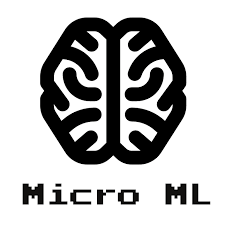

# MicroML on Arduino
[MicroML](https://openbase.com/python/micromlgen) bring Machine Learning algorithms to microcontrollers.

**Supported classifiers**
* DecisionTree
* RandomForest
* XGBoost
* Gaussian Naive Bayes
* Support Vector Machines (SVC and OneClassSVM)
* Relevant Vector Machines
* SEFR (Fast Linear-Time Classifier)
* PCA (Principal Component Analysis)

**Install micromlgen**

```pip install micromlgen```



In [ ]:
# Intall the micromlgen API
pip install micromlgen

  Created wheel for micromlgen: filename=micromlgen-1.1.23-cp37-none-any.whl size=29096 sha256=b951fa42b76f94c52d019506b00783b00b11b44da0d9fcbcb08b2628735af3e9
  Stored in directory: /root/.cache/pip/wheels/18/8a/f0/bc837db55f7e6159d94de85c7e3b3dd78db19109f4de268f5f
Successfully built micromlgen


# Port the Model to plain C/C++ code
Copy the resulting codes to your Arduino classifier sketch.

In [ ]:
# Include micromlgen library
from micromlgen import port

# Convert the classifier model in to C/C++ code
c_code = port(classifier, classmap=classmap)
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[3] = { 0 };
                        // tree #1
                        if (x[3] <= 0.7000000029802322) {
                            votes[1] += 1;
                        }

                        else {
                            if (x[2] <= 4.75) {
                                if (x[3] <= 1.6500000357627869) {
                                    votes[2] += 1;
                                }

                                else {
                                    votes[0] += 1;
                                }
                            }

                            else {
                                if (x[3] <= 1.8499999642372131) {